In [10]:
from read_mnist import read_images, read_labels
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dropout
import numpy as np
from nbutil import imshow_multi, to_pil
from keras.utils import np_utils


In [11]:
def load_dataset(name):
    def featurize(image):
        return image.astype(float) / 255.0
    images = np.array([featurize(image) for image in read_images(name + '-images-idx3-ubyte')])
    labels = np.array([label for label in read_labels(name + '-labels-idx1-ubyte')])
    return images, labels

In [12]:
import os
test_in, test_out = load_dataset('../data/t10k')
train_in, train_out = load_dataset('../data/train')
nb_classes = 10

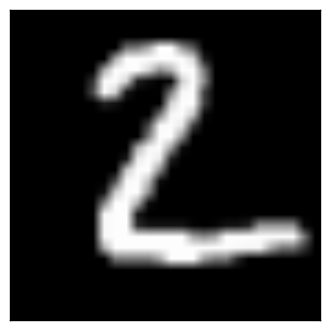

7


In [13]:
%matplotlib inline

imshow_multi([test_in[1]])
print test_out[0]

# print test_in[0].shape
# print test_in[0]

In [14]:
Y_train = np_utils.to_categorical(test_out, nb_classes)
X_train = np.array(test_in).reshape([-1, 28, 28, 1])

In [22]:
model = Sequential()
model.add(Convolution2D(32, 5, 5, border_mode='same', input_shape=[28,28,1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=[2, 2]))
model.add(Convolution2D(32, 5, 5, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=[2, 2]))
# 7x7x32
model.add(Flatten())
# model.add(Dropout(0.25))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_9 (Convolution2D)  (None, 28, 28, 32)    832         convolution2d_input_5[0][0]      
____________________________________________________________________________________________________
activation_15 (Activation)       (None, 28, 28, 32)    0           convolution2d_9[0][0]            
____________________________________________________________________________________________________
maxpooling2d_9 (MaxPooling2D)    (None, 14, 14, 32)    0           activation_15[0][0]              
____________________________________________________________________________________________________
convolution2d_10 (Convolution2D) (None, 14, 14, 32)    25632       maxpooling2d_9[0][0]             
___________________________________________________________________________________________

In [23]:

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [24]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=1,
          verbose=1)

Epoch 1/1
10000/10000 [==============================] - 2s - loss: 0.4769 - acc: 0.8492       